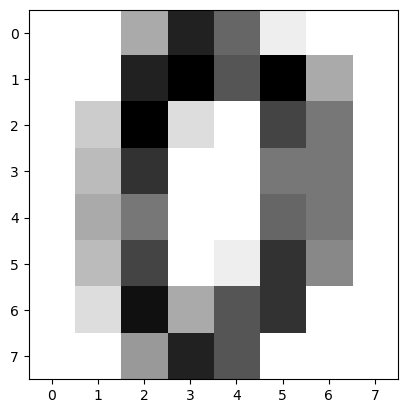

In [145]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [146]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [147]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [148]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [149]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

In [151]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [152]:
y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9805555555555555


[4]


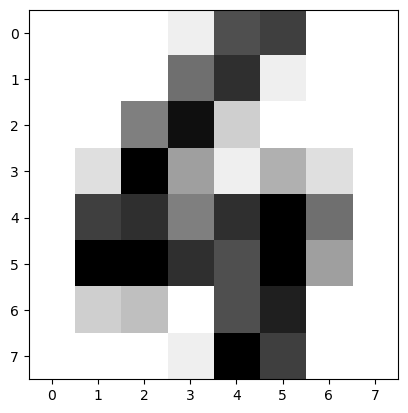

In [153]:
plt.imshow(X_test[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)

In [154]:
print(y_pred.shape)

(1,)


In [155]:
y_pred = knn.predict(X_test)

print(y_pred.shape)  # 확인용

# 필요하면 1차원으로 변경
if len(y_pred.shape) > 1:
    y_pred = y_pred.reshape(-1)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

(360,)
[[42  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  2  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  3  0  0  0  0  0  0 28  0]
 [ 0  0  0  1  0  0  0  1  0 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.91      1.00      0.95        29
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        34
           4       1.00      0.95      0.98        44
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        32
           7       0.93      1.00      0.96        37
           8       1.00      0.90      0.95        31
           9       1.00      0.96      0.98        46

    accuracy                           0.98       360
   macro avg

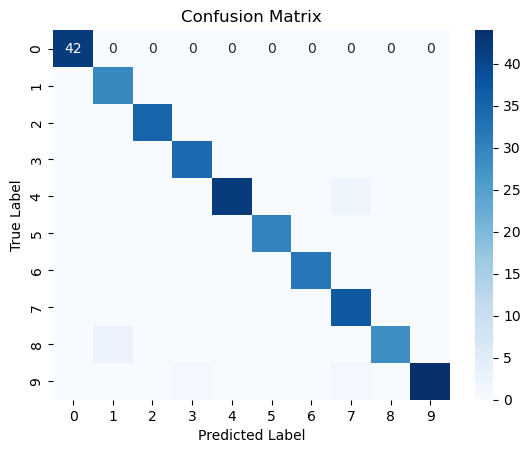

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [157]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred)
    print(f"{name} 정확도: {acc:.4f}")

KNN 정확도: 0.9861
SVM 정확도: 0.9861
Decision Tree 정확도: 0.8444


In [158]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, data, digits.target, cv=5)
print("각 fold 정확도:", scores)
print("평균 정확도:", scores.mean())

각 fold 정확도: [0.94444444 0.95833333 0.96657382 0.97493036 0.95264624]
평균 정확도: 0.9593856391210152


In [159]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.9861111111111112


In [160]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"k={k} 정확도: {metrics.accuracy_score(y_test, y_pred):.2f}")

k=1 정확도: 0.99
k=2 정확도: 0.99
k=3 정확도: 0.99
k=4 정확도: 0.99
k=5 정확도: 0.99
k=6 정확도: 0.98
k=7 정확도: 0.98
k=8 정확도: 0.98
k=9 정확도: 0.99
k=10 정확도: 0.98


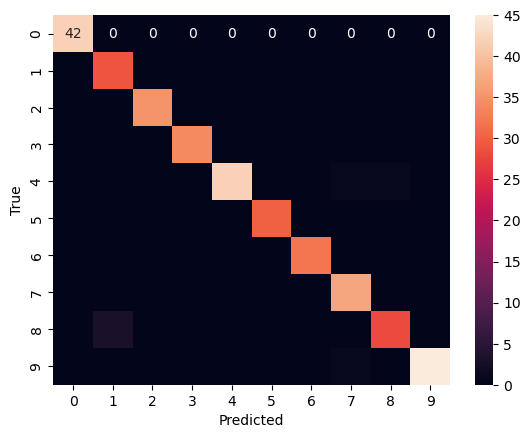

In [161]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)